In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
import featureGenerators as f
import dataHandler as data
import deltaRegressors as reg

In [3]:
rf=reg.GetRegressor("RandomForestRegressor")

In [3]:
tr_data = pd.read_csv("../data/main/training.csv",index_col=0).sort_values(["BUS_ID","TIMESTAMP"])
tr_data.head()

/home/bilguun/.local/lib/python3.6/site-packages/numpy/lib/arraysetops.py:569: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


,RECORD_DATE,BUS_ID,BUSROUTE_ID,BUSSTOP_ID,BUSSTOP_SEQ,TIMESTAMP
index,,,,,,
173467,2020-01-06 17:03:34,2053,11100010,380,21,1578330214
1624542,2020-01-13 07:28:25,2053,11100010,18,2,1578900505
1625151,2020-01-13 07:30:22,2053,11100010,11,3,1578900622
1625791,2020-01-13 07:32:25,2053,11100010,9,4,1578900745
1626425,2020-01-13 07:34:26,2053,11100010,6,5,1578900866


In [4]:
td=data.calcTimeDelta(tr_data)
td.head()

index
1624542    117.0
1625151    123.0
1625791    121.0
1626425    136.0
1627161    174.0
Name: TIMESTAMP, dtype: float64

In [10]:
td.cumsum()

[autoreload of deltaRegressors failed: Traceback (most recent call last):
  File "/home/bilguun/.local/lib/python3.6/site-packages/IPython/extensions/autoreload.py", line 245, in check
    superreload(m, reload, self.old_objects)
  File "/home/bilguun/.local/lib/python3.6/site-packages/IPython/extensions/autoreload.py", line 450, in superreload
    update_generic(old_obj, new_obj)
  File "/home/bilguun/.local/lib/python3.6/site-packages/IPython/extensions/autoreload.py", line 387, in update_generic
    update(a, b)
  File "/home/bilguun/.local/lib/python3.6/site-packages/IPython/extensions/autoreload.py", line 357, in update_class
    update_instances(old, new)
  File "/home/bilguun/.local/lib/python3.6/site-packages/IPython/extensions/autoreload.py", line 317, in update_instances
    update_instances(old, new, obj, visited)
  File "/home/bilguun/.local/lib/python3.6/site-packages/IPython/extensions/autoreload.py", line 300, in update_instances
    for obj in (obj for obj in objects if

index
1624542          117.0
1625151          240.0
1625791          361.0
1626425          497.0
1627161          671.0
1628090          777.0
1628653         1001.0
1629874         1145.0
1630675         1344.0
1631768         1463.0
1632383         1757.0
1633977         1952.0
1635040         2007.0
1635362         2154.0
1636166         2368.0
1637354         2486.0
1638013         2559.0
1638414         2637.0
1638825         2783.0
1639611         2943.0
1888579         3020.0
1888971         3119.0
1889483         3592.0
1892099         3684.0
1892597         3914.0
1893899         4048.0
1894673         4152.0
1895247         4400.0
1896626         4476.0
2816644         4628.0
              ...     
2881172    532796520.0
2881627    532796691.0
2882436    532796792.0
2882870    532796946.0
2883573    532797135.0
2884378    532797240.0
2884813    532797442.0
2885679    532797562.0
2886176    532797641.0
2886514    532797726.0
2886874    532797865.0
2887435    532798104.0
28883

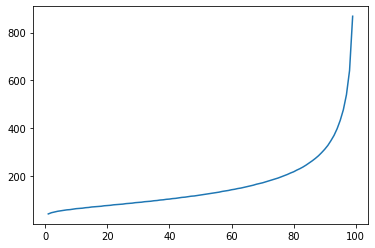

In [9]:
import matplotlib.pyplot as plt
plt.plot(list(range(1,100)),[td.quantile(i/100) for i in range(1,100)])
plt.show()

In [15]:
tr_data.head()

,RECORD_DATE,BUS_ID,BUSROUTE_ID,BUSSTOP_ID,BUSSTOP_SEQ,TIMESTAMP
index,,,,,,
173467,2020-01-06 17:03:34,2053,11100010,380,21,1578330214
1624542,2020-01-13 07:28:25,2053,11100010,18,2,1578900505
1625151,2020-01-13 07:30:22,2053,11100010,11,3,1578900622
1625791,2020-01-13 07:32:25,2053,11100010,9,4,1578900745
1626425,2020-01-13 07:34:26,2053,11100010,6,5,1578900866


In [19]:
tr_data.shift(1).head().fillna("na")

,RECORD_DATE,BUS_ID,BUSROUTE_ID,BUSSTOP_ID,BUSSTOP_SEQ,TIMESTAMP
index,,,,,,
173467,na,na,na,na,na,na
1624542,2020-01-06 17:03:34,2053,1.11e+07,380,21,1.57833e+09
1625151,2020-01-13 07:28:25,2053,1.11e+07,18,2,1.5789e+09
1625791,2020-01-13 07:30:22,2053,1.11e+07,11,3,1.5789e+09
1626425,2020-01-13 07:32:25,2053,1.11e+07,9,4,1.5789e+09


In [6]:
#test feature
def calc(X):
    d = X.loc[:, ~X.columns.isin(['TIMESTAMP', 'RECORD_DATE'])]
    for col in d.columns:
        d[col] = d[col].astype(str)
    return d 
def dest(X):
    d = X.loc[:, ~X.columns.isin(['TIMESTAMP', 'RECORD_DATE'])]
    for col in d.columns:
        d[col] = d[col].astype(str)
    return d 

In [7]:
features = calc(tr_data)
rf.train(features, td)

/home/bilguun/.local/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/home/bilguun/.local/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [8]:
rf.regressor.feature_importances_

array([0.60372327, 0.07554393, 0.19772372, 0.12300907])